## Detectando Sarcasmo

In [1]:
# Imports
import json
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import matplotlib
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [2]:
# Carregando os dados
with open("dataset/Sarcasm_Headlines_Dataset.json") as file:
    dados = json.load(file)

In [3]:
# Dados carregados
dados

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w

In [4]:
# Separando as variáveis
headline = []
sarcastic = []
for content in dados:
    headline.append(content["headline"])
    sarcastic.append(content["is_sarcastic"])

In [5]:
len(headline)

26709

In [7]:
# Tamanho para a amostra
tamanho_amostra = 15000

In [13]:
# Separando os dados

# Dados de entrada (X)
x_treino = headline[:tamanho_amostra]
x_teste = headline[tamanho_amostra:]

# Dados de saída (Y)
y_treino = sarcastic[:tamanho_amostra]
y_teste = sarcastic[tamanho_amostra:]

'\nColocar em um dataframe\n'

In [14]:
# Parâmetros
vocabulario = 10000
oov_token = "<OOV>"

# Calcular a frequencia das palavras para o dicionário

In [15]:
# Cria o tokenizer
tokenizer = Tokenizer(num_words = vocabulario, oov_token = oov_token)

In [16]:
# Atualiza o vocabulário interno com base em uma lista de textos.
tokenizer.fit_on_texts(x_treino)

In [17]:
# Transforma cada texto em textos em uma sequência de números inteiros. 
# Somente as palavras mais frequentes são levadas em consideração.
x_treino = tokenizer.texts_to_sequences(x_treino) 

In [18]:
x_treino

[[417, 1, 798, 2983, 2206, 43, 391, 2422, 1, 6, 2423, 1],
 [4, 7300, 2424, 2984, 22, 2, 163, 1, 364, 2985, 6, 226, 9, 887],
 [164, 888, 2, 836, 1725, 1982, 587, 4571, 227, 131, 37, 46, 2, 7301],
 [1514, 36, 219, 365, 2, 1332, 28, 263, 22, 10, 2425, 1419, 5589, 934],
 [767, 737, 5590, 1186, 7302, 626, 648, 5, 4, 100, 1058, 83],
 [7303, 4, 330, 70],
 [4, 5591, 392, 6, 525, 2986, 1612, 1515],
 [20, 451, 37, 987, 32, 169, 2, 116, 91, 18, 145, 6, 34, 429],
 [300, 2987, 7304, 430, 7305, 1726, 142],
 [2426, 341, 366, 418, 62, 1, 6, 4, 4572],
 [2427, 1858, 2988, 14, 39, 5592, 7306, 5, 1859, 988],
 [281, 799, 419, 8, 1727, 1728, 9, 2989],
 [236, 526, 2675, 13, 9, 837, 237, 325, 2, 3893, 1, 5593],
 [228, 4573, 1, 4574, 38, 245, 1, 6, 7, 172],
 [1, 1420, 738, 665, 5, 313, 3, 1059],
 [496, 1859, 1, 133, 7307, 6, 7308, 3894, 1516],
 [1983,
  1060,
  331,
  47,
  2990,
  301,
  263,
  889,
  2,
  23,
  1,
  19,
  1111,
  332,
  105,
  1112],
 [1860, 7309, 3398, 7310, 19, 7311, 1187],
 [7312, 838, 2,

In [19]:
# Mesmo procedimento anterior para dados de teste
x_teste = tokenizer.texts_to_sequences(x_teste) 

In [20]:
x_teste

[[89, 1023, 511, 2, 501, 17, 32, 865, 98, 32, 207, 6534],
 [857, 685, 1959, 8533, 856, 252],
 [391, 519, 28, 403, 91, 25, 1327, 3, 1, 78, 5, 3600, 196, 1],
 [2677, 7275, 5866, 16, 842, 1477, 253, 221, 8535, 10, 1],
 [9079, 3, 6745, 3009, 590, 133, 811, 6671, 6417, 2, 23, 291],
 [26, 2, 23, 1, 19, 191, 154],
 [656, 949, 1388, 1, 2482, 2, 636, 303, 1069, 777, 1],
 [3268, 150, 1, 7, 3556, 1, 7529, 11, 799, 5, 4, 1662],
 [190, 368, 1167, 25, 1202, 17, 1],
 [1660, 683, 2, 1],
 [423, 7, 2130, 2, 165, 285],
 [1820, 2070, 1879, 1, 23, 60, 1015, 3, 1],
 [540, 1820, 1782, 1, 11, 1106, 61, 930, 4, 1, 1, 6, 4, 52, 55],
 [1, 1, 9, 6730, 17, 205],
 [44,
  29,
  5273,
  772,
  3205,
  15,
  140,
  6037,
  3,
  118,
  2589,
  37,
  46,
  272,
  4516,
  8,
  1727,
  108,
  1729],
 [143, 641, 6, 1049, 2, 1428, 1, 1052, 98, 5160, 221],
 [569, 175, 826, 50, 13, 96, 59, 1590, 1, 6, 34, 583],
 [4, 100, 840, 463, 5, 4, 1556, 2776, 695],
 [1, 900],
 [122, 20, 2102, 495, 6012, 4, 1, 24, 3, 7, 3501, 2740],
 [30

In [21]:
# Parâmetros
padding = 'post'
trunc = 'post'
max_length = 100

In [22]:
# Sequence Padding nos dados de treino
padded_x_treino = pad_sequences(x_treino, padding=padding, truncating=trunc, maxlen=max_length)

In [23]:
# Sequence Padding nos dados de teste
padded_x_teste = pad_sequences(x_teste, padding=padding, truncating=trunc, maxlen=max_length)

In [24]:
# Converte todas as estruturas para array NumPy

# Converte X
x_treino = np.array(padded_x_treino)
x_teste = np.array(padded_x_teste)

# Converte y
y_treino = np.array(y_treino)
y_teste = np.array(y_teste)

In [25]:
x_treino.shape

(15000, 100)

In [26]:
y_treino.shape

(15000,)

In [27]:
x_teste.shape

(11709, 100)

In [28]:
y_teste.shape

(11709,)

In [38]:
embedding_dim = 16
model = Sequential()
model.add(Embedding(vocabulario, embedding_dim, input_length = max_length))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = "adam", loss = keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])
modelo = model.fit(x_treino, y_treino, epochs=25, validation_data=(x_teste, y_teste), verbose=2)

# Earlystop - BestModel

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________
Train on 15000 samples, validate on 11709 samples
Epoch 1/25
15000/15000 - 3s - loss: 0.6789 - accuracy: 0.5573 - val_loss: 0.6462 - val_accuracy: 0.6464
Epoch 2/25
15000/15000 - 2s - loss: 0.5001 - accuracy: 0.7839 - val_loss: 0.4068 - val_accur

In [39]:
# Métricas disponíveis para o modelo
modelo.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

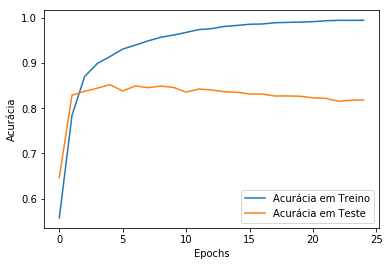

In [40]:
# Colocar gráfico lado a lado

# Plot da Acurácia
plt.plot(modelo.history['accuracy'])
plt.plot(modelo.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Acurácia')
plt.legend(['Acurácia em Treino', 'Acurácia em Teste'])
plt.xticks(np.arange(0, 20, step = 1))
plt.show()

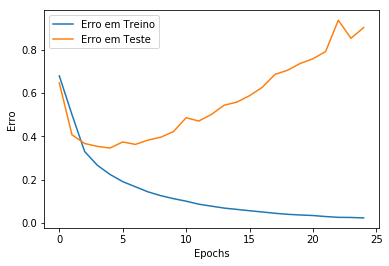

In [41]:
# Plot do Erro
plt.plot(modelo.history['loss'])
plt.plot(modelo.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Erro')
plt.legend(['Erro em Treino', 'Erro em Teste'])
plt.show()

### Detectando Sarcasmo em Novos Dados

In [45]:
# Novos Dados 
# Vamos detectar se cada frase uma das 4 frases abaixo é ou não sarcasmo
texto = ["I am actually not funny. I am just mean and people think I am joking",
         "I’d be fine if there were not so much blood in my alcohol system",
         "If you need so much space, there is always NASA",
         "game of thrones season finale showing this sunday night"]

In [46]:
# Precisamos aplicar em novos dados as mesmas transformações aplicadas nos dados de treino e teste
sequences = tokenizer.texts_to_sequences(texto)
padded = pad_sequences(sequences, maxlen = max_length, padding = padding, truncating = trunc)

In [47]:
# Previsões
print(model.predict_classes(padded))

[[0]
 [1]
 [1]
 [0]]


In [48]:
# Vamos associar as previsões a cada frase
for i, frase in enumerate(texto):
    previsao = model.predict_classes(padded)
    if previsao[i] == 0:
        print('\nA Frase <', frase, '> não é sarcasmo!')
    else:
        print('\nA Frase <', frase, '> é sarcasmo!')


A Frase < I am actually not funny. I am just mean and people think I am joking > não é sarcasmo!

A Frase < I’d be fine if there were not so much blood in my alcohol system > é sarcasmo!

A Frase < If you need so much space, there is always NASA > é sarcasmo!

A Frase < game of thrones season finale showing this sunday night > não é sarcasmo!
